<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read-in data</a></span></li><li><span><a href="#Technical-analysis" data-toc-modified-id="Technical-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Technical analysis</a></span></li><li><span><a href="#Simple-moving-averages---SMAs" data-toc-modified-id="Simple-moving-averages---SMAs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple moving averages - SMAs</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Requirements</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Technical analysis

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

# Read-in data
<hr style = "border:2px solid black" ></hr>

- The file contains end-of-day (EOD) data for different financial instruments as retrieved from the Thomson Reuters Eikon Data API.

In [2]:
filename = '../data/tr_eikon_eod_data.csv'  

In [3]:
f = open(filename, 'r')  
f.readlines()[:5]  

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

In [4]:
data = pd.read_csv(filename,  
                   index_col=0, 
                   parse_dates=True)  

In [5]:
rets = np.log(data / data.shift(1))  

# Technical analysis
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Rolling statistics are a major tool in the so-called **technical analysis** of stocks, as compared to the fundamental analysis.
- **Fundamental analysis** focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analyzed.

</font>
</div>

In [6]:
sym = 'AAPL.O'

In [7]:
data = pd.DataFrame(data[sym]).dropna()

In [8]:
data.tail()

AAPL.O
Date              
2018-06-25  182.17
2018-06-26  184.43
2018-06-27  184.16
2018-06-28  185.50
2018-06-29  185.11

In [9]:
window = 20  

In [10]:
data['min'] = data[sym].rolling(window=window).min()  

In [11]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [12]:
data['std'] = data[sym].rolling(window=window).std()  

In [13]:
data['median'] = data[sym].rolling(window=window).median()  

In [14]:
data['max'] = data[sym].rolling(window=window).max()  

In [15]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [16]:
data.dropna().head()

AAPL.O        min       mean       std     median        max  \
Date                                                                          
2010-02-01  27.818544  27.437544  29.580892  0.933650  29.821542  30.719969   
2010-02-02  27.979972  27.437544  29.451249  0.968048  29.711113  30.719969   
2010-02-03  28.461400  27.437544  29.343035  0.950665  29.685970  30.719969   
2010-02-04  27.435687  27.435687  29.207892  1.021129  29.547113  30.719969   
2010-02-05  27.922829  27.435687  29.099892  1.037811  29.419256  30.719969   

                 ewma  
Date                   
2010-02-01  27.805432  
2010-02-02  27.936337  
2010-02-03  28.330134  
2010-02-04  27.659299  
2010-02-05  27.856947

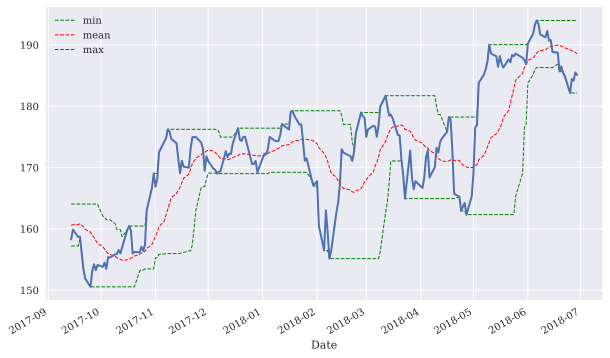

In [17]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=1)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  

# Simple moving averages - SMAs
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>
    
- A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). 
- The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. 

</font>
</div>

In [18]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [19]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [20]:
data[[sym, 'SMA1', 'SMA2']].tail()

AAPL.O        SMA1        SMA2
Date                                      
2018-06-25  182.17  185.606190  168.265556
2018-06-26  184.43  186.087381  168.418770
2018-06-27  184.16  186.607381  168.579206
2018-06-28  185.50  187.089286  168.736627
2018-06-29  185.11  187.470476  168.901032

<AxesSubplot:xlabel='Date'>

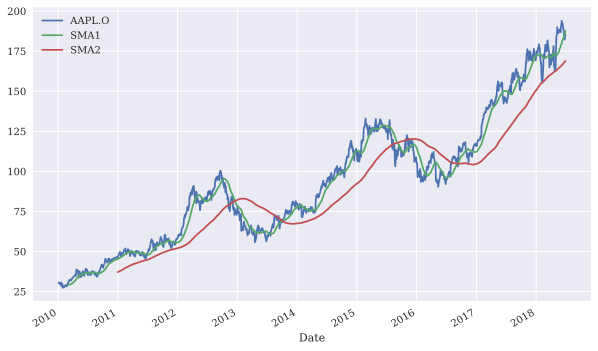

In [21]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

<div class="alert alert-info">
<font color=black>

- SMAs are used to derive posi‐ tions to implement a trading strategy. 
- Figure below visualizes a long position by a value of 1 and a short position by a value of -1. 
- The change in the position is triggered (visually) by a crossover of the two lines representing the SMA time series

</font>
</div>

In [22]:
data.dropna(inplace=True)  

In [23]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

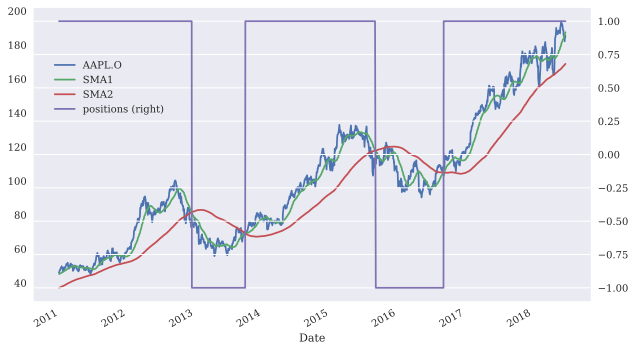

In [24]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch08/08_financial_time_series.ipynb
- Hilpisch, Yves. Python for finance: mastering data-driven finance. O'Reilly Media, 2018.
- [Data](https://github.com/yhilpisch/py4fi2nd/tree/master/source)

</font>
</div>

# Requirements
<hr style = "border:2px solid black" ></hr>

In [25]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

autopep8  : 1.7.0
matplotlib: 3.5.3
json      : 2.0.9
pandas    : 1.4.4
numpy     : 1.21.6

